# Parameterize Ethanol with HTMD

![](http://tiffanyhoang1.weebly.com/uploads/1/4/1/6/14165848/107796_orig.png)

## Import HTMD

HTMD has an in-built parameterization tool called `parameterize`. It has been going through some modifications lately, since it was a separate package and we have been integrating it into HTMD. Please be sure of having an HTMD version 1.0.26 or greater.

Let's start by importing HTMD:

In [1]:
from htmd import *
# so our plots remain in the notebook
%pylab inline
# utilities
import re

Please cite. HTMD: High-Throughput Molecular Dynamics for Molecular Discovery, J. Chem. Theory Comput., 2016, 12 (4), pp 1845-1852. http://pubs.acs.org/doi/abs/10.1021/acs.jctc.6b00049


You are on the latest HTMD version (1.0.26).
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Let's first look at Ethanol

Using what we have learned previouly, we can look at the compound we will be parameterizing, **ethanol**. Let's first load it, and then visualize it:

In [2]:
ethanol = Molecule('./ethanol.mol2')
ethanol.view(viewer='ngl')

As you can see, it is a very simple molecule, with just 9 atoms. Since `parameterize` does quantum calculations, which are computationally demanding, the more particles and torsions the compound we want to parameterize has, the longer it takes.

## Why do we need `Parameterize`?

![](https://static1.squarespace.com/static/52f2cd27e4b00e69a8f53575/t/545c0968e4b00e059c13b0d5/1415317865874/force_field.jpg)

* All molecules we want to simulate need parameters to describe their physical behaviour
* Many biomolecules are constituted by building blocks (ex: aminoacids) and their parameters are already available
* When we do `charmm.build`, we are basically fetching from a library of those parameters and assigning them to our molecules
* What if the molecule we want to simulate does not have parameters? We need to get them, hence, `parameterize`

## Import from Parameterize

So let's start to parameterize our ethanol. First, we need to some import the `Configuration` and `Parameterisation` classes from the `parameterize` module:

In [3]:
from htmd.parameterize import Configuration, Parameterisation

/home/joao/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Configure our Parameterization

`parameterize` works in a different way from other HTMD modules, since it can be called from outside python and it mainly runs a lot of routines (for QM calculation) which are managed by the python environment.

First, we need to configure our parameterization run using the `Configuration` class:

In [4]:
config = Configuration()
config.FileName = "./ethanol.mol2"
config.JobName = "ethanol-1"
config.NetCharge = "0"
#config.NCORES = 4 # if one wants to define them, otherwise it will use all resources available
#config.MEMORY = 4 #

## Let's Parameterize!

In [5]:
param = Parameterisation(config=config)

2016-05-31 08:18:25,044 - htmd.parameterize - INFO - Staging in input mol2/pdb file
2016-05-31 08:18:25,049 - htmd.parameterize - INFO - run(): Starting run in [/home/joao/.htmd/gaamp/ethanol-1]
2016-05-31 08:18:25,050 - htmd.parameterize - INFO - run(): Step [input] in dir [/home/joao/.htmd/gaamp/ethanol-1/000-input]
2016-05-31 08:18:25,051 - htmd.parameterize - INFO - completed(): Expected outputfile [ligand.xyz] not present
2016-05-31 08:18:25,052 - htmd.parameterize - INFO - run(): Running step [input]
2016-05-31 08:18:25,053 - htmd.parameterize - INFO -  Running step [0] 	[input] 


Running step [000] [input]


2016-05-31 08:18:25,089 - htmd.parameterize - INFO - run(): Step [preoptimize] in dir [/home/joao/.htmd/gaamp/ethanol-1/010-preoptimize]
2016-05-31 08:18:25,091 - htmd.parameterize - INFO - completed(): Expected outputfile [mol-opt.xyz] not present
2016-05-31 08:18:25,093 - htmd.parameterize - INFO - run(): Running step [preoptimize]
2016-05-31 08:18:25,093 - htmd.parameterize - INFO -  Running step [10] 	[preoptimize] 


Running step [010] [preoptimize]
Running QM Calculations: 100% (1/1) [##############################] eta --:-- -

2016-05-31 08:18:27,623 - htmd.parameterize - INFO - run(): Step [initial_parameters] in dir [/home/joao/.htmd/gaamp/ethanol-1/020-initial_parameters]
2016-05-31 08:18:27,624 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.rtf] not present
2016-05-31 08:18:27,625 - htmd.parameterize - INFO - run(): Running step [initial_parameters]
2016-05-31 08:18:27,626 - htmd.parameterize - INFO -  Running step [20] 	[initial_parameters] 



Running step [020] [initial_parameters]


2016-05-31 08:18:29,256 - htmd.parameterize - INFO - run(): Step [generate_structure] in dir [/home/joao/.htmd/gaamp/ethanol-1/030-generate_structure]
2016-05-31 08:18:29,261 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.xpsf] not present
2016-05-31 08:18:29,265 - htmd.parameterize - INFO - run(): Running step [generate_structure]
2016-05-31 08:18:29,266 - htmd.parameterize - INFO -  Running step [30] 	[generate_structure] 


Running step [030] [generate_structure]


2016-05-31 08:18:29,342 - htmd.parameterize - INFO - run(): Step [esp] in dir [/home/joao/.htmd/gaamp/ethanol-1/110-esp]
2016-05-31 08:18:29,344 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.xpsf] not present
2016-05-31 08:18:29,347 - htmd.parameterize - INFO - run(): Running step [esp]
2016-05-31 08:18:29,348 - htmd.parameterize - INFO -  Running step [110] 	[esp] 


Running step [110] [esp]
Running QM Calculations: 100% (1/1) [##############################] eta --:-- |

2016-05-31 08:18:36,834 - htmd.parameterize - INFO - run(): Step [fit_esp] in dir [/home/joao/.htmd/gaamp/ethanol-1/120-fit_esp]
2016-05-31 08:18:36,837 - htmd.parameterize - INFO - completed(): Expected outputfile [cg-list.txt] not present
2016-05-31 08:18:36,842 - htmd.parameterize - INFO - run(): Running step [fit_esp]
2016-05-31 08:18:36,844 - htmd.parameterize - INFO -  Running step [120] 	[fit_esp] 



Running step [120] [fit_esp]


2016-05-31 08:18:36,957 - htmd.parameterize - INFO - run(): Step [fit_water] in dir [/home/joao/.htmd/gaamp/ethanol-1/150-fit_water]
2016-05-31 08:18:36,959 - htmd.parameterize - INFO - completed(): Expected outputfile [soft-dih-list.txt] not present
2016-05-31 08:18:36,967 - htmd.parameterize - INFO - run(): Running step [fit_water]
2016-05-31 08:18:36,968 - htmd.parameterize - INFO -  Running step [150] 	[fit_water] 


Running step [150] [fit_water]
Running QM Calculations: 100% (4/4) [##############################] eta 00:00 /


2016-05-31 08:18:47,810 - htmd.parameterize - INFO - run(): Step [pes] in dir [/home/joao/.htmd/gaamp/ethanol-1/220-pes]
2016-05-31 08:18:47,813 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.prm] not present
2016-05-31 08:18:47,816 - htmd.parameterize - INFO - run(): Running step [pes]
2016-05-31 08:18:47,817 - htmd.parameterize - INFO -  Running step [220] 	[pes] 


Running step [220] [pes]


2016-05-31 08:18:47,884 - htmd.parameterize - INFO - run(): Step [qm_1d_scan] in dir [/home/joao/.htmd/gaamp/ethanol-1/230-qm_1d_scan]
2016-05-31 08:18:47,886 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.prm] not present
2016-05-31 08:18:47,889 - htmd.parameterize - INFO - run(): Running step [qm_1d_scan]
2016-05-31 08:18:47,890 - htmd.parameterize - INFO -  Running step [230] 	[qm_1d_scan] 


Running step [230] [qm_1d_scan]
Running QM Calculations: 100% (37/37) [############################] eta 00:01 \

2016-05-31 08:33:46,745 - htmd.parameterize - INFO - run(): Step [1d-fitting] in dir [/home/joao/.htmd/gaamp/ethanol-1/240-1d-fitting]
2016-05-31 08:33:46,748 - htmd.parameterize - INFO - completed(): Expected outputfile [soft-dih-list.txt] not present
2016-05-31 08:33:46,754 - htmd.parameterize - INFO - run(): Running step [1d-fitting]
2016-05-31 08:33:46,755 - htmd.parameterize - INFO -  Running step [240] 	[1d-fitting] 



Running step [240] [1d-fitting]


2016-05-31 08:33:47,339 - htmd.parameterize - INFO - run(): Step [refitcharges] in dir [/home/joao/.htmd/gaamp/ethanol-1/250-refitcharges]
2016-05-31 08:33:47,341 - htmd.parameterize - INFO - completed(): Expected outputfile [new-mol.xpsf] not present
2016-05-31 08:33:47,347 - htmd.parameterize - INFO - run(): Running step [refitcharges]
2016-05-31 08:33:47,348 - htmd.parameterize - INFO -  Running step [250] 	[refitcharges] 


Running step [250] [refitcharges]


2016-05-31 08:33:47,464 - htmd.parameterize - INFO - run(): Step [refittorsions] in dir [/home/joao/.htmd/gaamp/ethanol-1/260-refittorsions]
2016-05-31 08:33:47,466 - htmd.parameterize - INFO - completed(): Expected outputfile [torsion-para-*.dat] not present
2016-05-31 08:33:47,470 - htmd.parameterize - INFO - run(): Running step [refittorsions]
2016-05-31 08:33:47,471 - htmd.parameterize - INFO -  Running step [260] 	[refittorsions] 


Running step [260] [refittorsions]


2016-05-31 08:33:47,571 - htmd.parameterize - INFO - run(): Step [rotamer] in dir [/home/joao/.htmd/gaamp/ethanol-1/270-rotamer]
2016-05-31 08:33:47,573 - htmd.parameterize - INFO - completed(): Expected outputfile [all-rotamer.dat] not present
2016-05-31 08:33:47,578 - htmd.parameterize - INFO - run(): Running step [rotamer]
2016-05-31 08:33:47,579 - htmd.parameterize - INFO -  Running step [270] 	[rotamer] 


Running step [270] [rotamer]
Running QM Calculations: 100% (3/3) [##############################] eta 00:01 \

2016-05-31 08:35:06,013 - htmd.parameterize - INFO - run(): Step [fit_rotamer] in dir [/home/joao/.htmd/gaamp/ethanol-1/280-fit_rotamer]
2016-05-31 08:35:06,014 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.rtf] not present
2016-05-31 08:35:06,018 - htmd.parameterize - INFO - run(): Running step [fit_rotamer]
2016-05-31 08:35:06,019 - htmd.parameterize - INFO -  Running step [280] 	[fit_rotamer] 



Running step [280] [fit_rotamer]


2016-05-31 08:35:06,596 - htmd.parameterize - INFO - run(): Step [results] in dir [/home/joao/.htmd/gaamp/ethanol-1/999-results]
2016-05-31 08:35:06,598 - htmd.parameterize - INFO - completed(): Expected outputfile [mol.rtf] not present
2016-05-31 08:35:06,601 - htmd.parameterize - INFO - run(): Running step [results]
2016-05-31 08:35:06,602 - htmd.parameterize - INFO -  Running step [999] 	[results] 


Running step [999] [results]


## `Parameterize` structure and organization

As said before, `parameterize` works a bit different from HTMD, also in the way it stores the information it produces. Since a ligand parameterization can take days, the several steps of `parameterize` are "checkpointed" inside a directory:

In [7]:
param.directory

'/home/joao/.htmd/gaamp/ethanol-1'

We can list what is inside that directory:

In [8]:
%ls /home/joao/.htmd/gaamp/ethanol-1

000-input/               120-fit_esp/     250-refitcharges/   configuration
010-preoptimize/         150-fit_water/   260-refittorsions/  configuration.sh
020-initial_parameters/  220-pes/         270-rotamer/        QM-para.txt
030-generate_structure/  230-qm_1d_scan/  280-fit_rotamer/    routines
110-esp/                 240-1d-fitting/  999-results/


## `Parameterize` Runs Management

The structure of `parameterize` allows resuming previous jobs (not covered today) and multiple runs. As such, each `parameterize` run must have a different name. You can list which ones are already taken:

In [9]:
Parameterisation.listJobs()

	param_at
	test_ethanol
	test_benzamidine
	ethanol-1


If you want to delete a run, you can use:

In [10]:
#Parameterisation.deleteJob('ethanol-1') # uncomment if you want to delete the job

## Back to Ethanol: Minimized Structure

During `parameterize`, the molecule is optimized/minimized using quantum mechanics. We can look at the end result molecule:

In [11]:
min_ethanol = param.getMolecule()
min_ethanol.view(viewer='ngl')

Look at how the alcohol group hydrogen moved.

## Torsions: MM vs. QM vs. Parameterize

We can see which dihedrals were parameterized, either by the atom indexes:

In [12]:
param.getDihedralIndexes()

[[2, 1, 3, 9]]

Or by visualizing the dihedral (using a dihedral index):

In [13]:
param.showDihedral(0)

## Plot Dihedral Energetics

We can plot the dihedrals and compare the initial MM, QM, and parameterized MM:

/home/joao/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


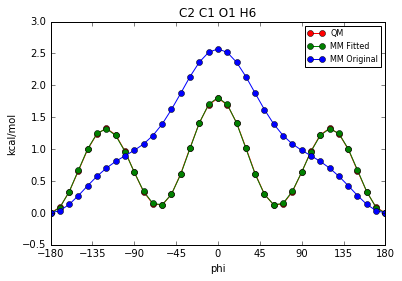

In [14]:
(torsionfiles, torsionnames) = param.plotDihedrals(show=False)

In [15]:
print(torsionfiles, torsionnames)

['/tmp/tmpdtpps1dn.svg'] ['C2 C1 O1 H6']


In [16]:
for i  in range(len(torsionfiles)):
    shutil.copyfile(torsionfiles[i], "torsion-potential-" + re.sub(" ", "-", torsionnames[i]) + ".svg" )

## Get the Parameter files

In [17]:
paramfiles = param.getParameters()
shutil.copyfile(paramfiles['RTF'], "ethanol.rtf")
shutil.copyfile(paramfiles['PRM'], "ethanol.prm")
shutil.copyfile(paramfiles['PDB'], "ethanol-final.pdb")

'ethanol-final.pdb'

These structure and parameter files are then compatible to use with CHARMM topologies and are ready to import into HTMD and simulate. You can see the protein ligand tutorial, where the .prm and .rtf files of the ligand are given to  `charmm.build`

As an extra, you can try and parameterize benzamidine at home and check the more complex results. Note: it will take much longer...